# 17Í∏∞ KNN Ï†ïÍ∑úÏÑ∏ÏÖò Í≥ºÏ†ú

## KNN Íµ¨ÌòÑÌï¥Î≥¥Í∏∞
### 1. Preprocssing / EDA
ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïö¥ ÎÇ¥Ïö©ÏùÑ ÌÜ†ÎåÄÎ°ú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏûêÏú†Î°≠Í≤å Ï†ÑÏ≤òÎ¶¨ÏôÄ EDAÎ•º ÏßÑÌñâÌï¥Ï£ºÏÑ∏Ïöî.
### 2. KNN Íµ¨ÌòÑ & ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
ÏàòÏóÖ ÎÇ¥Ïö© Î∞è Ïã§Ïäµ ÏûêÎ£åÎ•º Ï∞∏Í≥†ÌïòÏó¨ KNNÏùÑ Íµ¨ÌòÑÌïòÍ≥† ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÌïòÎ©∞ Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Ï£ºÏÑ∏Ïöî.
### 3. Evaluation
Í≤∞Í≥ºÏóê ÎåÄÌïú ÌèâÍ∞ÄÎ•º ÏßÑÌñâÌïòÍ≥†, ÎÇòÎ¶ÑÏùò Ìï¥ÏÑùÏùÑ Îã¨ÏïÑÏ£ºÏÑ∏Ïöî.

**Îç∞Ïù¥ÌÑ∞:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, DistanceMetric, NearestNeighbors

from collections import Counter

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1001088  P00046042      F  0-17          10             A   
1  1004493  P00347742      F  0-17          10             A   
2  1005302  P00048942      F  0-17          10             A   
3  1001348  P00145242      F  0-17          10             A   
4  1001348  P00106742      F  0-17          10             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          3               0                   5   
1                          1               0                   7   
2                          1               0                   1   
3                          3               0                   2   
4                          3               0                   3   

   Product_Category_2  Product_Category_3  Purchase  
0                17.0                 NaN      2010  
1                 NaN                 NaN      4483  
2                 4.0                 NaN      7696  
3                 4.0                 NaN     16429  
4                 5.0                 NaN      5780

##1.Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è Ï†ÑÏ≤òÎ¶¨

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [4]:
df.describe()
#12Í∞ú Ïª¨ÎüºÏùò Ï¥ù 4998Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë product_category 2ÏôÄ 3Ïùò Í≤∞Ï∏°ÏπòÍ∞Ä Ïã¨Ìï®.
#Ï†ïÍ∑úÌôîÎèÑ ÏßÑÌñâÌï¥Ïïº Ìï† ÎìØ
#purchaseÎ•º targetÎ≥ÄÏàòÎ°ú ÏßÄÏ†ï

User_ID   Occupation  Marital_Status  Product_Category_1  \
count  4.998000e+03  4998.000000     4998.000000         4998.000000   
mean   1.003015e+06     8.036815        0.421369            5.320128   
std    1.709910e+03     6.442697        0.493828            3.912281   
min    1.000003e+06     0.000000        0.000000            1.000000   
25%    1.001560e+06     2.000000        0.000000            1.000000   
50%    1.003040e+06     7.000000        0.000000            5.000000   
75%    1.004417e+06    14.000000        1.000000            8.000000   
max    1.006037e+06    20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3      Purchase  
count         3465.000000         1544.000000   4998.000000  
mean             9.773737           12.766839   9234.655462  
std              5.101867            4.023591   4999.225081  
min              2.000000            3.000000     13.000000  
25%              5.000000            9.000000   5497.750000  
50%              9.000000           14.000000   8049.000000  
75%             15.000000           16.000000  12039.000000  
max             18.000000           18.000000  23913.000000

In [5]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

product_category3Ïùò Í≤ΩÏö∞ Í≤∞Ï∏°ÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ,ÏôúÍ≥°Ïù¥ ÏùºÏñ¥ÎÇ† Ïàò ÏûàÏúºÎØÄÎ°ú dropÌïúÎã§.
product_category2Ïùò Í≤ΩÏö∞Îäî...

Î∞©Î≤ï1_Í≤∞Ï∏°Ïπò ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ∏∞

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer = SimpleImputer(strategy='most_frequent')

In [8]:
df[['Product_Category_2']] = imputer.fit_transform(df[['Product_Category_2']])

In [9]:
imputer.statistics_

array([8.])

In [10]:
df_1 = df.drop(['Product_Category_3', 'User_ID'], axis = 1) 

In [11]:
df['Product_ID'].nunique()
#Ï§ëÎ≥µÎêòÎäî Í∞íÏù¥ ÏûàÏùå.

1797

Î∞©Î≤ï2)Product IDÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ Í∞Å Í∑∏Î£πÏóê Ìï¥ÎãπÌïòÎäî product_category2 ÏµúÎπàÍ∞íÏùÑ **Í≤∞Ï∏°ÏπòÏóê** Îß§Ïπ≠Ìï¥ Ï§Ñ ÏàòÎèÑ ÏûàÏùå.

In [26]:
#Categorical feature one-hot encoding

categorical_1 = ['Gender', 'Age', 'Occupation', 'City_Category', 
                 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2']

encoder_1 = OneHotEncoder().fit(df_1[categorical_1])     # One-Hot-Encoding
encoder_1.get_feature_names(categorical_1)     # Í∞Å Feature Ïù¥Î¶Ñ ÌôïÏù∏


array(['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9',
  

In [27]:
# One-Hot-Encoding (2) - Product_ID Column

for i in P003_index:     # Î®ºÏ†Ä Ï†úÌíà ID Í∞íÏùÑ Í∞Å Ï†úÌíà IDÏùò 4Î≤àÏß∏ Ïà´ÏûêÎ°ú ÎåÄÏ≤¥ - Í∑∏Î£πÌôî
    df_1.iloc[i, 0] = 3
for i in P000_index:
    df_1.iloc[i, 0] = 0
for i in P002_index:
    df_1.iloc[i, 0] = 2
for i in P009_index:
    df_1.iloc[i, 0] = 9
for i in P001_index:
    df_1.iloc[i, 0] = 1

encoder_2 = OneHotEncoder().fit(df_1[['Product_ID']])     # One-Hot-Encoding
encoder_2.get_feature_names(['Product_ID'])   

array(['Product_ID_0', 'Product_ID_1', 'Product_ID_2', 'Product_ID_3',
       'Product_ID_9'], dtype=object)

In [28]:
# ÏµúÏ¢Ö DataFrame ÎèÑÏ∂ú
# ÏµúÏ¢Ö DataFrame ÎèÑÏ∂ú

endcoded_data_1 = pd.DataFrame(encoder_1.transform(df_1[categorical_1]).toarray(),
                               index = df_1.index,
                               columns = encoder_1.get_feature_names(categorical_1))     # One-Hot-Encoding (1)Ïùò Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú!
endcoded_data_2 = pd.DataFrame(encoder_2.transform(df_1[['Product_ID']]).toarray(),
                               index = df_1.index,
                               columns = encoder_2.get_feature_names(['Product_ID']))     # One-Hot-Encoding (2)Ïùò Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú!

# ÏúÑÏóêÏÑú ÎßåÎì§Ïñ¥ÏßÑ DataFrameÍ≥º Í∏∞Ï°¥ DataFrame concatÌïú ÌõÑ, One-Hot-Encoding Ïù¥Ï†Ñ Categorical ColumnÎì§ÏùÄ drop!

df_2 = pd.concat([df_1, endcoded_data_1], sort = False, axis = 1)
df_3 = pd.concat([df_2, endcoded_data_2], sort = False, axis = 1)
df_3 = df_3.drop(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
                  'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2'], axis = 1)

df_3

Marital_Status  Purchase  Gender_F  Gender_M  Age_0-17  Age_18-25  \
0                  0      2010       1.0       0.0       1.0        0.0   
1                  0      4483       1.0       0.0       1.0        0.0   
2                  0      7696       1.0       0.0       1.0        0.0   
3                  0     16429       1.0       0.0       1.0        0.0   
4                  0      5780       1.0       0.0       1.0        0.0   
...              ...       ...       ...       ...       ...        ...   
4993               1     11701       0.0       1.0       0.0        0.0   
4994               1      2045       0.0       1.0       0.0        0.0   
4995               1      4505       0.0       1.0       0.0        0.0   
4996               1      1413       0.0       1.0       0.0        0.0   
4997               1      7182       0.0       1.0       0.0        0.0   

      Age_26-35  Age_36-45  Age_46-50  Age_51-55  ...  \
0           0.0        0.0        0.0        0.0  ...   
1           0.0        0.0        0.0        0.0  ...   
2           0.0        0.0        0.0        0.0  ...   
3           0.0        0.0        0.0        0.0  ...   
4           0.0        0.0        0.0        0.0  ...   
...         ...        ...        ...        ...  ...   
4993        0.0        0.0        0.0        0.0  ...   
4994        0.0        0.0        0.0        0.0  ...   
4995        0.0        0.0        0.0        0.0  ...   
4996        0.0        0.0        0.0        0.0  ...   
4997        0.0        0.0        0.0        0.0  ...   

      Product_Category_2_14.0  Product_Category_2_15.0  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
4993                      0.0                      0.0   
4994                      0.0                      0.0   
4995                      0.0                      0.0   
4996                      0.0                      0.0   
4997                      1.0                      0.0   

      Product_Category_2_16.0  Product_Category_2_17.0  \
0                         0.0                      1.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
4993                      1.0                      0.0   
4994                      0.0                      0.0   
4995                      0.0                      0.0   
4996                      0.0                      0.0   
4997                      0.0                      0.0   

      Product_Category_2_18.0  Product_ID_0  Product_ID_1  Product_ID_2  \
0                         0.0           1.0           0.0           0.0   
1                         0.0           0.0           0.0           0.0   
2                         0.0           1.0           0.0           0.0   
3                         0.0           0.0           1.0           0.0   
4                         0.0           0.0           1.0           0.0   
...                       ...           ...           ...           ...   
4993                      0.0           0.0           1.0           0.0   
4994                      0.0           0.0           0.0           0.0   
4995                      0.0           0.0           1.0           0.0   
4996                      0.0           0.0           0.0           0.0   
4997                      0.0           0.0           1.0           0.0   

      Product_ID_3  Product_ID_9  
0              0.0           0.0  
1              1.0           0.0  
2              0.0  

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 4998 non-null   int64  
 1   Purchase                       4998 non-null   int64  
 2   Gender_F                       4998 non-null   float64
 3   Gender_M                       4998 non-null   float64
 4   Age_0-17                       4998 non-null   float64
 5   Age_18-25                      4998 non-null   float64
 6   Age_26-35                      4998 non-null   float64
 7   Age_36-45                      4998 non-null   float64
 8   Age_46-50                      4998 non-null   float64
 9   Age_51-55                      4998 non-null   float64
 10  Age_55+                        4998 non-null   float64
 11  Occupation_0                   4998 non-null   float64
 12  Occupation_1                   4998 non-null   f

In [30]:
X = df_3.drop(['Purchase'], axis = 1)     # ÏÑ§Î™ÖÎ≥ÄÏàò
y = df_3.Purchase     # Target

In [31]:
#splitting training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

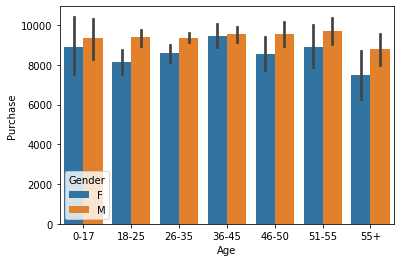

In [55]:
sns.barplot(x=df_1['Age'],y=df_1['Purchase'],hue=df_1['Gender'])
##Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú maleÏùò ÏÜåÎπÑÍ∞Ä ÎÜíÏùå.
#Ï£ºÏÜåÎπÑÏ∏µÏùÄ 18-45ÏÑ∏Ïùò male

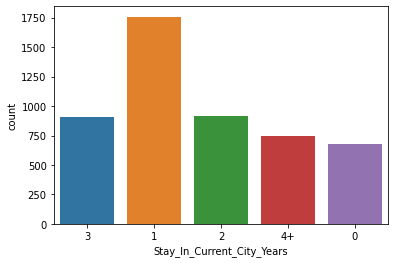

In [53]:
sns.countplot(df_1['Stay_In_Current_City_Years'])

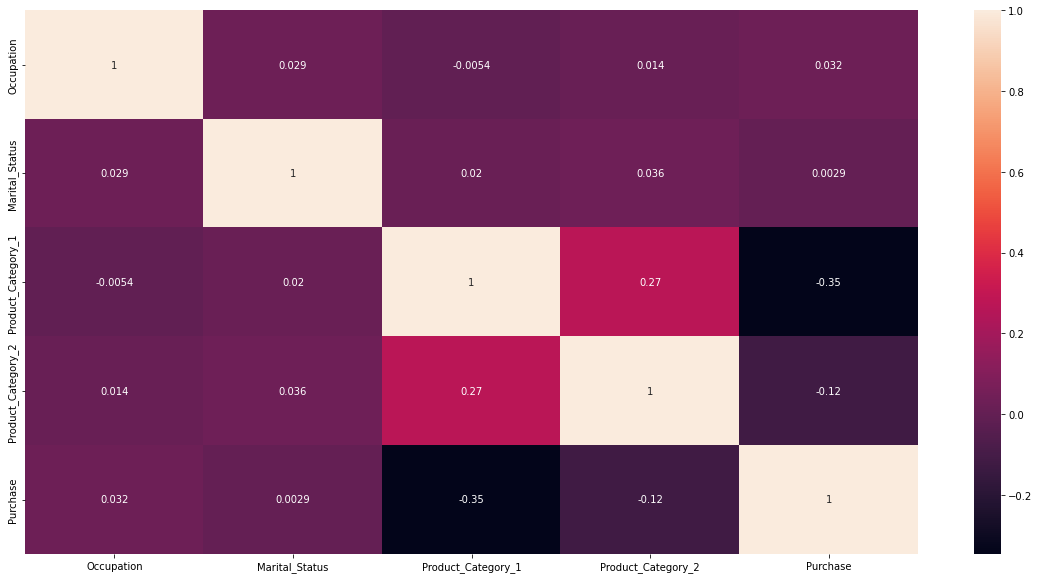

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(df_1.corr(),annot=True)

##2.data analysis
KNN_kÍµ¨ÌïòÍ∏∞
1)Grid Search
2)K-fold cross-validation

1. ÏùºÎ∞òÏ†ÅÏù∏ Í∑úÏπôÏùÄ ÏóÜÏùå (Î∂ÑÏÑùÍ∞ÄÏùò Ï£ºÍ¥ÄÏóê ÏùòÏ°¥)
2. ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÏóÜÍ≥† Ïûò Íµ¨Ï°∞ÌôîÎêú Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ KÍ∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Good üëçüèª
3. Î≥¥ÌÜµ 1~20 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú ÏÑ§Ï†ï
4. ÎèôÏ†êÏù¥ ÎÇòÏò§Îäî Í≤ΩÏö∞Î•º ÎßâÍ∏∞ ÏúÑÌïòÏó¨ Î≥¥ÌÜµ ÌôÄÏàòÎ•º ÏÇ¨Ïö©

In [32]:
k_range = range(1, 21) #Î≥¥ÌÜµÏùò Í≤ΩÏö∞
train_accuracy = []
test_accuracy = []

for k in tqdm_notebook(k_range):
    reg = KNeighborsRegressor(n_neighbors = k)     # default : weights = 'uniform(Í∞ÄÏ§ëÏπò ÏóÜÏùå)', p = 2 (standard Euclidean metric)
    reg.fit(X_train, y_train)
    train_accuracy.append(reg.score(X_train, y_train))     # Train DataÏóê ÎåÄÌïú Í≤∞Ï†ïÍ≥ÑÏàò
    test_accuracy.append(reg.score(X_test, y_test))     # Test DataÏóê ÎåÄÌïú Í≤∞Ï†ïÍ≥ÑÏàò

  0%|          | 0/20 [00:00<?, ?it/s]

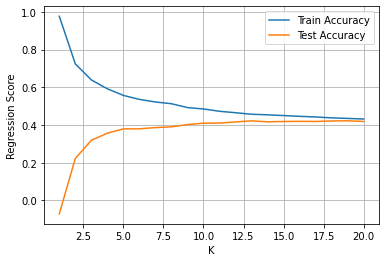

In [33]:
# K Î≥ÄÌôîÏóê Îî∞Î•∏ Accuracy Î≥ÄÌôî ÏãúÍ∞ÅÌôî

plt.plot(k_range, train_accuracy, label = "Train Accuracy")
plt.plot(k_range, test_accuracy, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Regression Score")
plt.grid()
plt.legend()
plt.show()

ÍµêÏ∞® Í≤ÄÏ¶ù

In [37]:
cv_scores = []

for k in tqdm_notebook(k_range):
    cv_reg = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(cv_reg, X_train, y_train)
    cv_scores.append(scores.mean())

  0%|          | 0/20 [00:00<?, ?it/s]

In [38]:
max_acc = np.max(cv_scores)     # AccuracyÏùò ÏµúÎåìÍ∞í

best_k = [k_range[i] for i in range(len(cv_scores))     # best_k : AccuracyÎ•º ÏµúÎåÄÎ°ú ÌïòÎäî KÎ•º Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏
         if cv_scores[i] == max_acc]

print(max_acc)
print("Besk K Value :", best_k)

0.3626063786650466
Besk K Value : [15]


In [39]:
pd.Series(cv_scores).sort_values(ascending = False).index[:9]

Int64Index([14, 13, 15, 17, 16, 12, 10, 18, 11], dtype='int64')

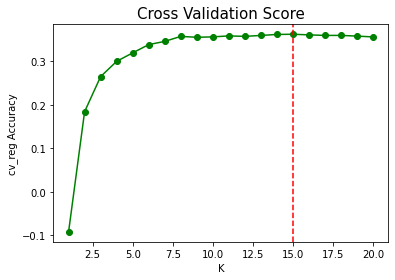

In [40]:
plt.plot(k_range, cv_scores, 'go-')
plt.title("Cross Validation Score", fontsize = 15)
plt.xlabel("K")
plt.ylabel("cv_reg Accuracy")
plt.axvline(best_k[0], color = "r", linestyle = "--")
plt.show()

##KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.001


In [42]:
results = knn.predict(X_test)
results

array([ 5280,  3489,    62,  2089,  7871,  3674,  3586,  5156,  5835,
        5355,  5436,  8292,  7637,  1690,  1919,  3495,  6921,  8584,
        3900,  7769,  3476, 11484,  3585,  5206,  6983,  6986,  3893,
        6073,  5327, 11497,  2283,  8111,  7920,  5313,  7706,  5465,
        2803,  4443,  5143,  5423,  4070,  5292,  5994,  5823,  4234,
        3443,  3513,  3938,  3526,  7708,  2122,  3977,  3513,  5194,
        9948,  3428,  3562,  3675,  3976,  2864, 11497,  5865,  8056,
        1804,  3682,  3677,  4198,  6997,  2849,  5225,  4081,  4543,
       11905, 11610,  3644,  7718,  7788,  2050,  3585,  3454,  3753,
        3536,  3930,  5146,  5842,  7066,  5187,  4009,  4001,  4424,
        3036,  3930,  7001,  3580,  4080,  7795,  3038,  5940,  5209,
       10701,  2012,  3482,  5235,  5487,  1433,  4054,  3695,  3675,
        5236,  4513,  5287,  3531,  4008,  5892,  1941,  3552,  1504,
        1877,  4300,  3514,  4658,  3442,  1905,   941, 11635,  5236,
        1802,  3577,